In [29]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sys

sys.path.append(".")
from sd_dist_generator import get_sd

In [30]:
def calculate_std_dev_mean_norm_rank(n, k):
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n must be a positive integer.")
    if not isinstance(k, int) or k <= 0:
        raise ValueError("k must be a positive integer.")
    if k > n:
        raise ValueError("Sample size k cannot be greater than population size n.")

    # Handle the edge case where n=1 (which implies k=1)
    # The formula works, but avoids potential division by zero in FPC derivation
    if n == 1:
        return 0.0  # Mean is always 0.5, std dev is 0

    # Calculate the variance using the derived formula: Var(m) = (n+1)(n-k) / (12 * n^2 * k)
    variance = ((n + 1) * (n - k)) / (12.0 * (n ** 2) * k)

    # Standard deviation is the square root of the variance
    # Ensure variance is non-negative due to potential float precision issues
    return math.sqrt(max(0.0, variance))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


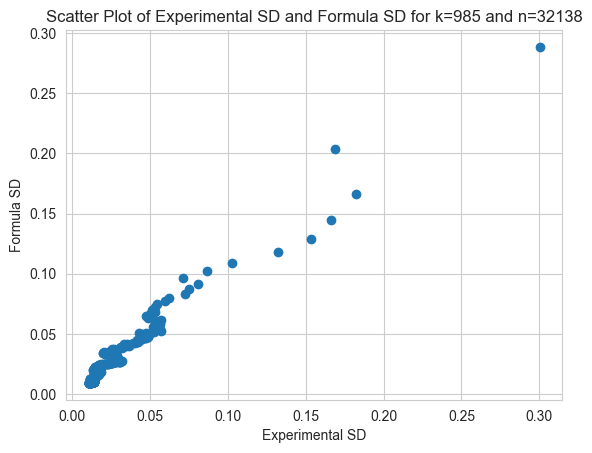

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


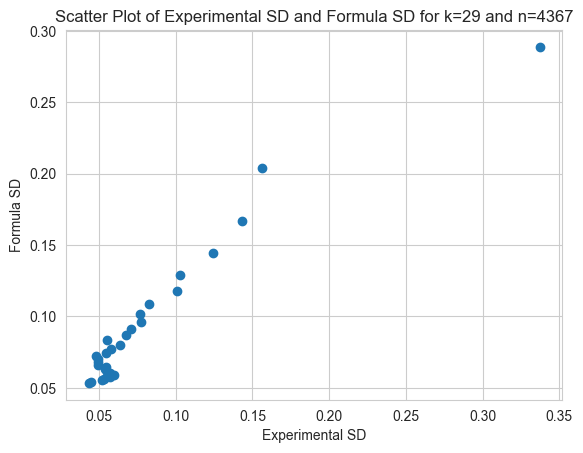

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


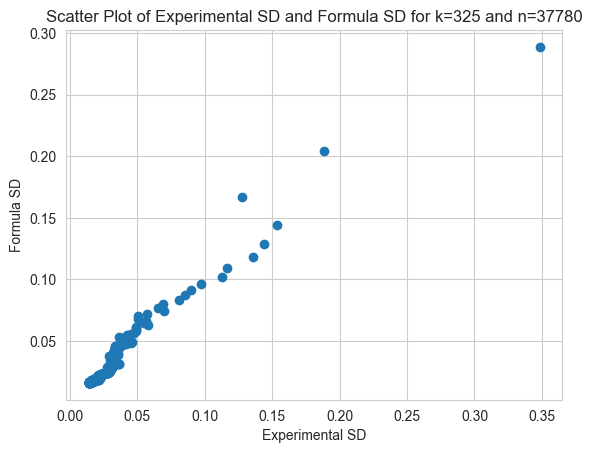

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


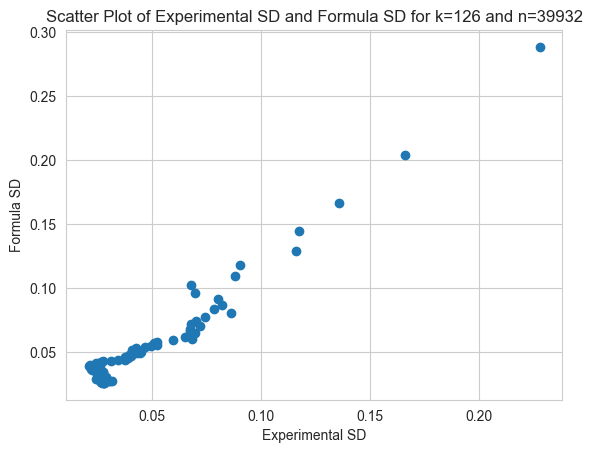

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


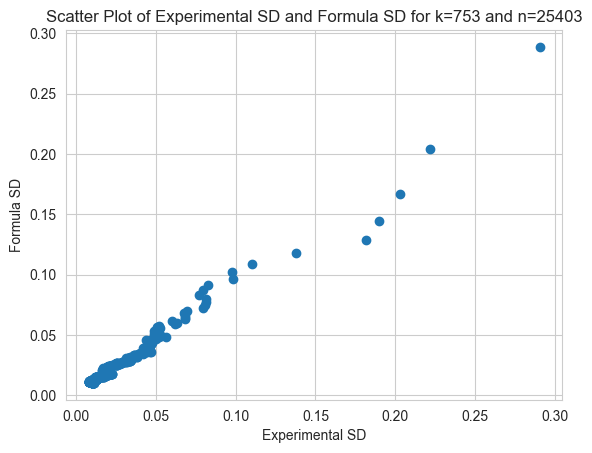

In [19]:
# generate random k
for _ in range(5):
    k = np.random.randint(1, 1_000)  # Random k
    n = np.random.randint(k + 100, 10_000)  # Random n > k
    iters = 10

    dist = get_sd(k, n, iters)
    dist_df = pd.DataFrame(dist)

    temp = []
    for i in range(1, k + 1):
        std_dev = calculate_std_dev_mean_norm_rank(n, i)
        temp.append(std_dev)

    # Convert to DataFrame
    sd_the_df = pd.DataFrame(temp)

    # Scatter plot
    plt.scatter(dist_df, sd_the_df)
    plt.title(f"Scatter Plot of Experimental SD and Formula SD for k={k} and n={n}")
    plt.xlabel("Experimental SD")
    plt.ylabel("Formula SD")
    plt.grid(True)
    plt.show()

## Part-2
Draw histogram of p-values

Simulations finished.


/var/folders/0z/_9h6zw2x0sx2p1s_zxl52pjr0000gn/T/ipykernel_47700/1822208985.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


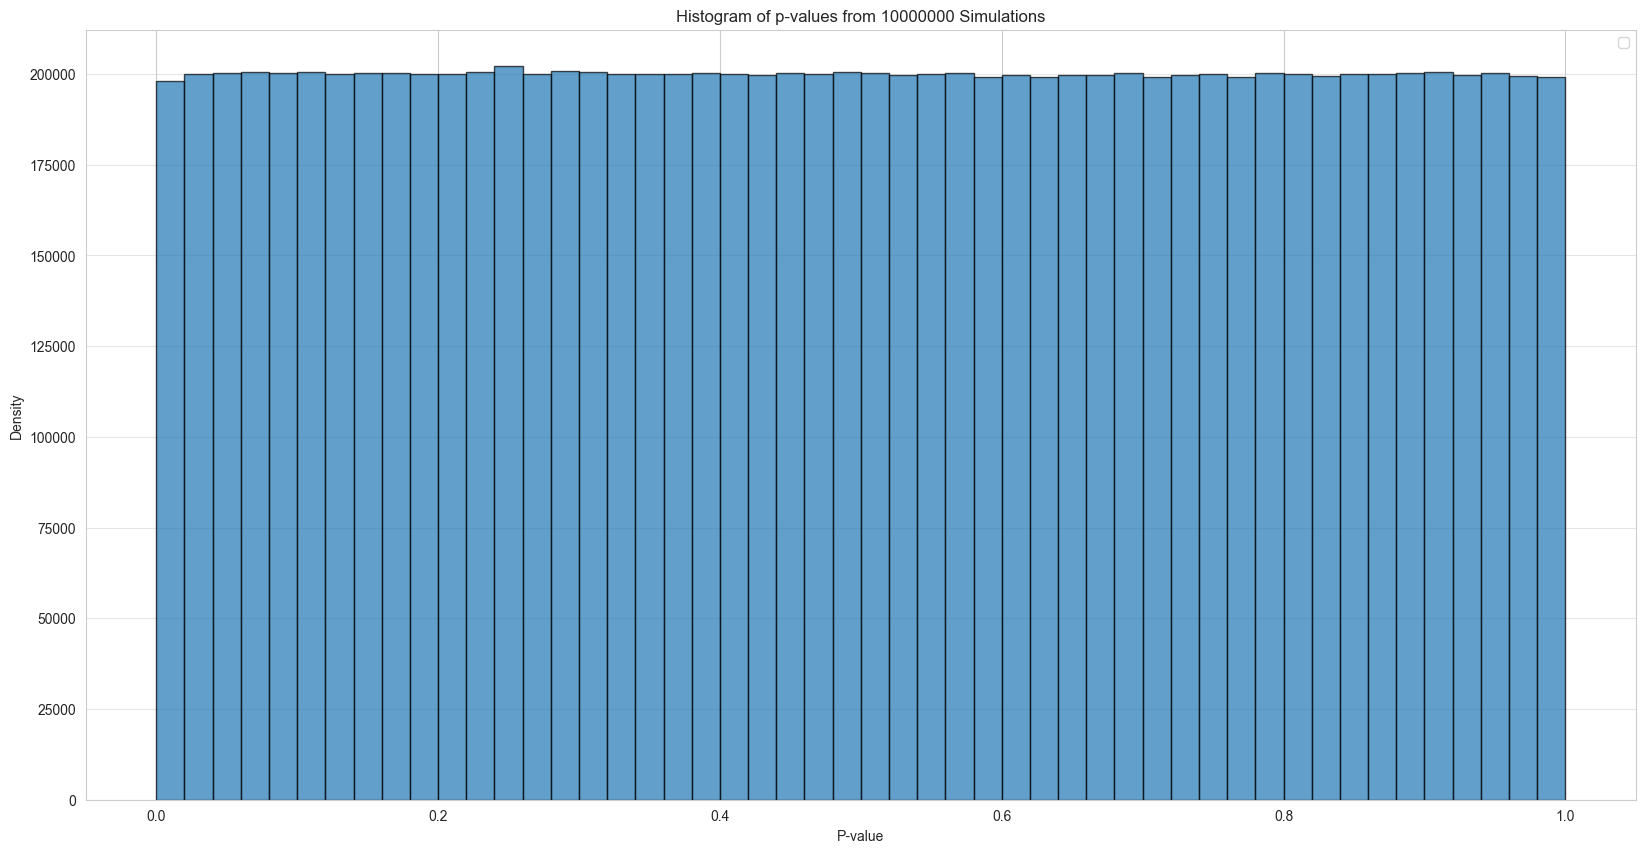

In [48]:
from scipy.stats import norm
from scipy.special import erf
import seaborn as sns

num_simulations = 10_000_000  # Number of simulations to run for the histogram
p_values = []

for _ in range(num_simulations):
    k = np.random.randint(1, 1_000)  # Random k
    n = np.random.randint(k + 100, 10_000)  # Random n > k

    ranks = np.arange(1, n + 1)
    sampled_ranks = np.random.choice(ranks, k, replace=False)  # Sample k ranks without replacement
    normalized_ranks = (sampled_ranks - 0.5) / n
    Observed_mean_rank = np.mean(normalized_ranks)  # Observed mean

    mu_null = 0.5  # Theoretical mean under H0 (random sampling)
    sigma_null = calculate_std_dev_mean_norm_rank(n, k)  # Theoretical std dev

    # Calculate the z-score
    z_score = (Observed_mean_rank - mu_null) / sigma_null
    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

    # Append the p-value to the list
    p_values.append(p_value)

print("Simulations finished.")

# Plot histogram of p-values
plt.figure(figsize=(20, 10))
plt.hist(p_values, bins=50, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of p-values from {num_simulations} Simulations')
plt.xlabel('P-value')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

/var/folders/0z/_9h6zw2x0sx2p1s_zxl52pjr0000gn/T/ipykernel_47700/3032354287.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


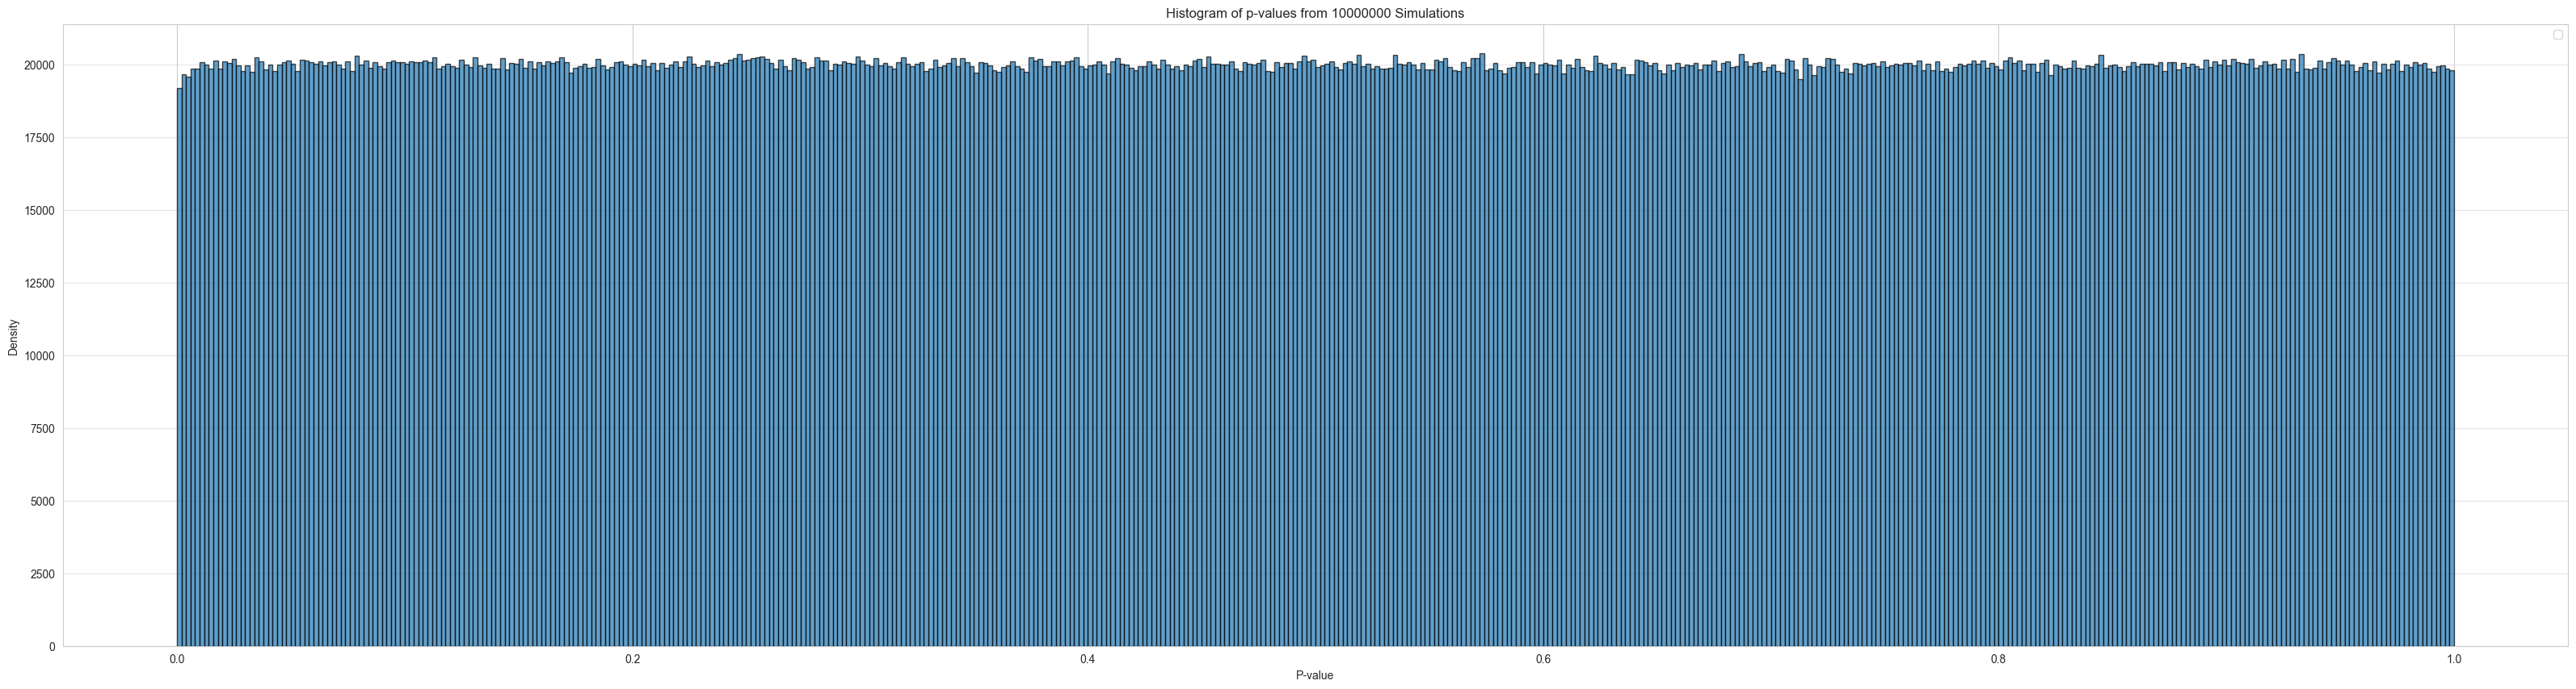

In [51]:

# Plot histogram of p-values
plt.figure(figsize=(40, 10))
plt.hist(p_values, bins=500, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of p-values from {num_simulations} Simulations')
plt.xlabel('P-value')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()